<a href="https://colab.research.google.com/github/Abtin-Ghorbani/AppliedAI_FashionMNIST/blob/main/masters_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dawnload dataset from Kaggle**

In [ ]:
from google.colab import drive
import os
import shutil
import kagglehub
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q Kaggle
from google.colab import files
files.upload()
import os
# فقط در صورت نبود فایل zip، دانلود کن
if not os.path.exists("chest-xray-pneumonia.zip"):
    !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
else:
    print(" Dataset ZIP already exists")
# فقط اگر فولدر chest_xray نیست، unzip کن
if not os.path.exists("dataset/chest_xray"):
    !unzip -q chest-xray-pneumonia.zip -d dataset
else:
    print(" Dataset already extracted")
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#  دانلود فقط اگر فایل ZIP هنوز وجود نداره
if not os.path.exists("chest-xray-pneumonia.zip"):
    !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
else:
    print("Dataset ZIP already exists")

# ✅ استخراج فقط اگر فولدر اصلی chest_xray هنوز ساخته نشده
if not os.path.exists("dataset/chest_xray"):
    !unzip -n chest-xray-pneumonia.zip -d dataset
    !rm -rf dataset/__MACOSX  # حذف فایل‌های مزاحم مک
else:
    print("Dataset already extracted")


Saving kaggle.json to kaggle (3).json
 Dataset ZIP already exists
 Dataset already extracted
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset ZIP already exists
Dataset already extracted


In [ ]:
import os

base_dir = '/content/dataset/chest_xray'
print(os.listdir(base_dir))#folder names

['test', '__MACOSX', 'train', 'chest_xray', 'val']


# **task 1 data preproccessing**

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [ ]:
import os
import random

# Path to the PNEUMONIA folder
pneumonia_folder = '/content/dataset/chest_xray/train/PNEUMONIA'

# List all image files in the folder
all_images = os.listdir(pneumonia_folder)

# Check if there are at least 2534 images
if len(all_images) >= 2534:
    # Randomly select 2534 images
    images_to_remove = random.sample(all_images, 2534)

    # Delete each selected image
    for img in images_to_remove:
        img_path = os.path.join(pneumonia_folder, img)
        os.remove(img_path)
        print(f"Removed: {img_path}")

    print(f"Successfully removed {len(images_to_remove)} images.")
else:
    print(f"Error: Folder has only {len(all_images)} images (less than 2534).")

Error: Folder has only 1340 images (less than 2534).


#wote

In [ ]:
import os
import tensorflow as tf

img_size = (224, 224)
batch_size = 32
base_dir = "dataset/chest_xray"

# بارگذاری دیتای آموزش بدون split
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(base_dir, 'train'),
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# بارگذاری دیتای اعتبارسنجی (validation)
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(base_dir, 'val'),
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# بارگذاری دیتای تست
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(base_dir, 'test'),
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

Found 2681 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
# prompt: write a code to show number of imaegs inside /content/dataset/chest_xray/train/NORMAL and /content/dataset/chest_xray/train/pneumonia

normal_train_dir = '/content/dataset/chest_xray/train/NORMAL'
pneumonia_train_dir = '/content/dataset/chest_xray/train/PNEUMONIA'

normal_train_count = len(os.listdir(normal_train_dir))
pneumonia_train_count = len(os.listdir(pneumonia_train_dir))

print(f"Number of images in {normal_train_dir}: {normal_train_count}")
print(f"Number of images in {pneumonia_train_dir}: {pneumonia_train_count}")

Number of images in /content/dataset/chest_xray/train/NORMAL: 1341
Number of images in /content/dataset/chest_xray/train/PNEUMONIA: 1340


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
for images, labels in train_ds.take(1):  # فقط یک batch می‌گیریم
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Labels:", labels.numpy())  # چاپ لیبل‌های واقعی

Images shape: (32, 224, 224, 3)
Labels shape: (32, 1)
Labels: [[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


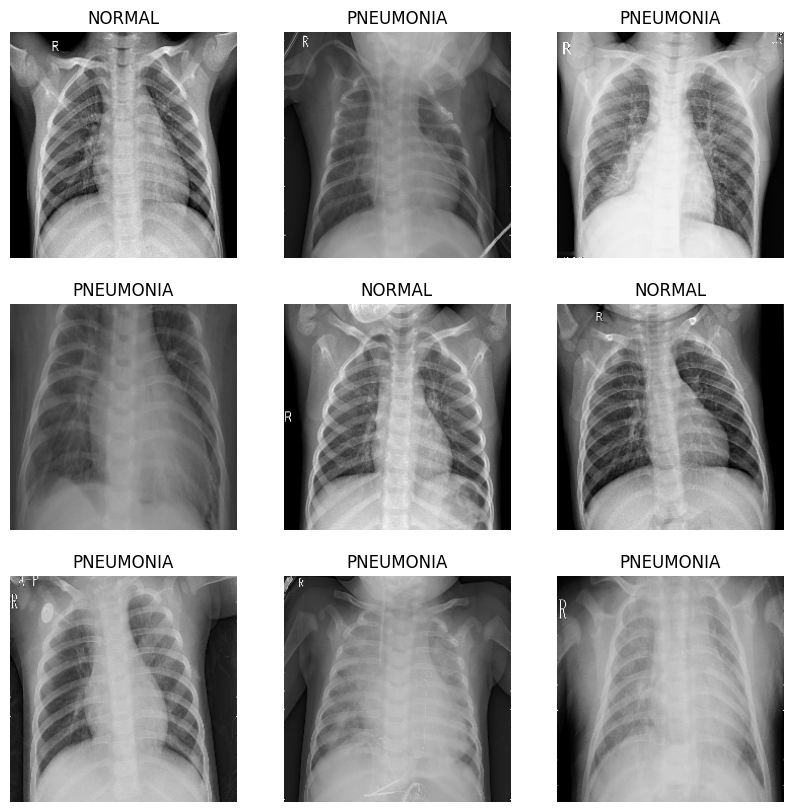

In [ ]:
import matplotlib.pyplot as plt

class_names = ['NORMAL', 'PNEUMONIA']

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

# **Normalization**

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [ ]:
def preprocess(image, label):
    image = preprocess_input(image)  # between mobile net [-1, 1]
    return image, label
train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)
test_ds = test_ds.map(preprocess)

# **buld and Train CNN model for pneumonia classification**

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf

In [ ]:
# Load the base MobileNetV2 model without the top classification layers
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False# Freeze the base model so its weights do not change during training

# **buil model **

In [ ]:
# Build the full model on top of MobileNetV2
model_mobilenet = models.Sequential([
    base_model,   # Pretrained convolutional base
    layers.GlobalAveragePooling2D(),  # Reduce feature map to vector (1280)
    layers.Dropout(0.2),   #to prevent overfitting
    layers.Dense(1, activation='sigmoid') #  Pneumonia or normal
])

# **compile the model **

In [ ]:
# Compile the model with optimizer, loss, and metric
model_mobilenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
    loss='binary_crossentropy',                                # For binary classification
    metrics=['accuracy']
)

# **train model with images**

In [ ]:
# Train the model using early stopping
history = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        # tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]
)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 237ms/step - accuracy: 0.5527 - loss: 0.8601 - val_accuracy: 0.7260 - val_loss: 0.5774
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6881 - loss: 0.5951 - val_accuracy: 0.7997 - val_loss: 0.4911
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8052 - loss: 0.4751 - val_accuracy: 0.8397 - val_loss: 0.4359
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8509 - loss: 0.4150 - val_accuracy: 0.8702 - val_loss: 0.3946
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8747 - loss: 0.3574 - val_accuracy: 0.8766 - val_loss: 0.3685
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9039 - loss: 0.3165 - val_accuracy: 0.8846 - val_loss: 0.3464
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9162 - loss: 0.2901 - val_accuracy: 0.8926 - val_loss: 0.3305
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9266 - loss: 0.2634 - val_accuracy: 0.8846 -

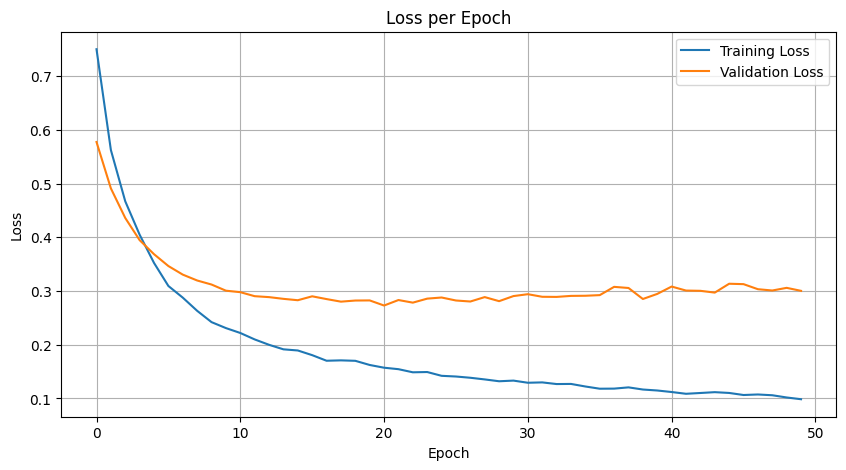

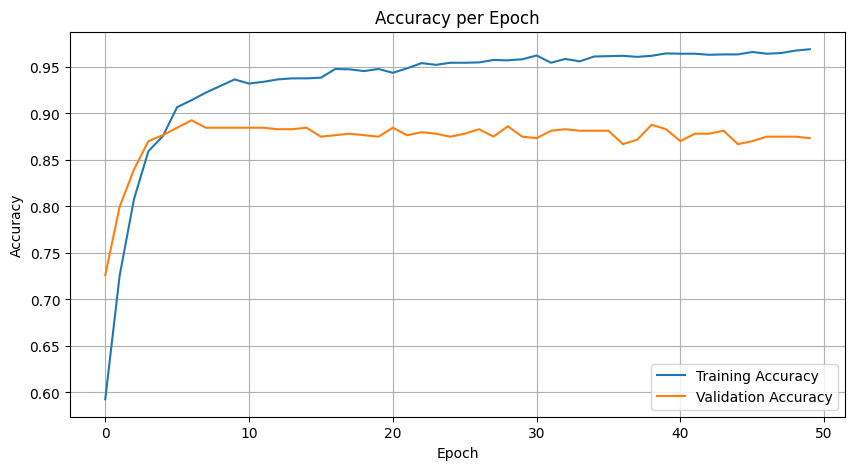

In [ ]:
# prompt: write a code to show loss / epoch

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**save model tranfer learning**

In [ ]:
model_mobilenet.save("mobilenetv2_transfer_only_final.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
0.9999521


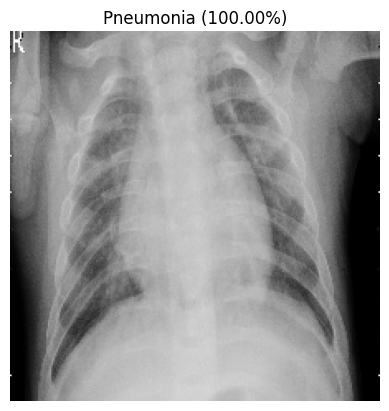

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

# Load model
model = model_mobilenet
# Load and preprocess image
img_path = '/content/dataset/chest_xray/train/PNEUMONIA/person1062_virus_1762.jpeg'  # Update path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict
prediction = model.predict(img_array)
print(prediction[0][0])
result = "Pneumonia" if prediction[0][0] > 0.5 else "Normal"
confidence = prediction[0][0] if result == "Pneumonia" else 1 - prediction[0][0]

# Display
plt.imshow(img)
plt.title(f"{result} ({confidence:.2%})")
plt.axis('off')
plt.show()

# **evaluate model**

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model_mobilenet.evaluate(test_ds)
print(f"Test Accuracy for mobile net: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9375 - loss: 0.1577
Test Accuracy for mobile net: 0.9375


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: predicts and labels
y_true_befor = []
y_pred_befor = []
for images, labels in test_ds:
    preds_befor = model_mobilenet.predict(images)
    preds_befor = (preds_befor > 0.6).astype("int32")  # آستانه‌ی sigmoid
    y_true_befor.extend(labels.numpy())
    y_pred_befor.extend(preds_befor)

# Step 2 evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_true_befor, y_pred_befor))

print("\nClassification Report for transfer learning:")
print(classification_report(y_true_befor, y_pred_befor, target_names=['NORMAL', 'PNEUMONIA']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Confusion Matrix:
[[7 1]
 [0 8]]

Classification Report for transfer learning:
              precision    recall  f1-score   support

      NORMAL       1.00      0.88      0.93         8
   PNEUMONIA       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



In [ ]:
# prompt: write a code to save this model_mobilenet tu goggle drive in this folder /content/drive/MyDrive/masters project

model_save_path = '/content/drive/MyDrive/masters project/mobilenetv2_transfer_only_final.keras'
model_mobilenet.save(model_save_path)
print(f"Model saved to: {model_save_path}")

Model saved to: /content/drive/MyDrive/masters project/mobilenetv2_transfer_only_final.keras


# **fine tune model**

In [ ]:
from tensorflow.keras.models import clone_model

model_finetuned = clone_model(model_mobilenet)#copy the previos model
model_finetuned.set_weights(model_mobilenet.get_weights())


In [ ]:
base_model = model_finetuned.layers[0]
base_model.trainable = True

#unfreeze the last 30
for layer in base_model.layers[:-30]:
    layer.trainable = False

In [ ]:
model_finetuned.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Smaller LR for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint(
    "mobilenetv2_best_val_loss.keras",
    save_best_only=True,
    monitor="val_loss",
    mode="min",
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
    mode="min",
    verbose=1
)

In [ ]:
history_fine = model_finetuned.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/15
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9131 - loss: 0.2075
Epoch 1: val_loss improved from inf to 0.50040, saving model to mobilenetv2_best_val_loss.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.9134 - loss: 0.2070 - val_accuracy: 0.8029 - val_loss: 0.5004
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9671 - loss: 0.0942
Epoch 2: val_loss improved from 0.50040 to 0.49110, saving model to mobilenetv2_best_val_loss.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9671 - loss: 0.0942 - val_accuracy: 0.8173 - val_loss: 0.4911
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9808 - loss: 0.0685
Epoch 3: val_loss did not improve from 0.49110
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9808 - loss: 0.0685 - val_accuracy: 0.8237 - val_loss: 0.5101
Epoch 4/15
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9872 - loss: 0.0503
Epoch 4: val_loss did not improve from 0.49110
163/163

**save finetuned model**

In [ ]:
model_finetuned.save("mobilenetv2_finetuned_final.keras")

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model_finetuned.evaluate(test_ds)
print(f"Test Accuracy after fine tuning: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8750 - loss: 0.3244
Test Accuracy after fine tuning: 0.8750


**evaluate transfer learnin method**

In [ ]:
from tensorflow.keras.models import load_model

model_mobilenet = load_model("mobilenetv2_transfer_only_final.keras")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: predicts and labels
y_true_befor = []
y_pred_befor = []
for images, labels in test_ds:
    preds_befor = model_mobilenet.predict(images)
    preds_befor = (preds_befor > 0.8).astype("int32")  # آستانه‌ی sigmoid
    y_true_befor.extend(labels.numpy())
    y_pred_befor.extend(preds_befor)

# Step 2 evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_true_befor, y_pred_befor))

print("\nClassification Report for transfer learning:")
print(classification_report(y_true_befor, y_pred_befor, target_names=['NORMAL', 'PNEUMONIA']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Confusion Matrix:
[[8 0]
 [1 7]]

Classification Report for transfer learning:
              precision    recall  f1-score   support

      NORMAL       0.89      1.00      0.94         8
   PNEUMONIA       1.00      0.88      0.93         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



In [ ]:
finetuned_model = load_model("mobilenetv2_finetuned_final.keras")

**fine tune evaluate**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: predicts and labels
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = finetuned_model.predict(images)
    preds = (preds > 0.6).astype("int32")  # آستانه‌ی sigmoid
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# Step 2 evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report for fine tuning:")
print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Confusion Matrix:
[[7 1]
 [0 8]]

Classification Report for fine tuning:
              precision    recall  f1-score   support

      NORMAL       1.00      0.88      0.93         8
   PNEUMONIA       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



# **for improving recall apply data augmation and class weights**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

In [ ]:
train_dir = 'dataset/chest_xray/train'

# شمارش عکس‌های هر کلاس
normal_count = len(os.listdir(os.path.join(train_dir, "NORMAL")))
pneumonia_count = len(os.listdir(os.path.join(train_dir, "PNEUMONIA")))
print("NORMAL:", normal_count, "| PNEUMONIA:", pneumonia_count)

# Augmentation همراه با validation split برای آموزش و ارزیابی
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1
)

train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

NORMAL: 1341 | PNEUMONIA: 3875
Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.


In [ ]:
labels = train_ds.classes
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(weights))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(1.9449047224523612), 1: np.float64(0.6730217889908257)}


In [ ]:
model_mobilenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss', restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("mobilenetv2_aug_weighted.keras", save_best_only=True, monitor='val_loss')

history_aug = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[earlystop_cb, checkpoint_cb],
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 118s 753ms/step - accuracy: 0.9024 - loss: 0.3660 - val_accuracy: 0.9251 - val_loss: 0.2144
Epoch 2/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 94s 642ms/step - accuracy: 0.9172 - loss: 0.2015 - val_accuracy: 0.9021 - val_loss: 0.2312
Epoch 3/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 94s 642ms/step - accuracy: 0.9144 - loss: 0.2051 - val_accuracy: 0.8964 - val_loss: 0.2284


In [ ]:
model_mobilenet.save("mobilenetv2_aug_weighted_final.keras")

In [ ]:
from tensorflow.keras.models import load_model

model_aug_weighted = load_model("mobilenetv2_aug_weighted.keras")

test_loss, test_acc = model_aug_weighted.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8750 - loss: 0.2952
Test Accuracy: 0.8750


In [ ]:
y_pred_probs_aug = model_aug_weighted.predict(test_ds)
y_pred_aug = (y_pred_probs_aug > 0.6).astype("int32").flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


# **evaluate model with aug and balanced weight classes**

In [ ]:
y_true_aug = []
for _, labels in test_ds:
    y_true_aug.extend(labels.numpy())
y_true_aug = np.array(y_true_aug).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_true_aug, y_pred_aug))

print("\nClassification Report after agu and classes:")
print(classification_report(y_true_aug, y_pred_aug, target_names=["NORMAL", "PNEUMONIA"]))


Confusion Matrix:
[[8 0]
 [3 5]]

Classification Report after agu and classes:
              precision    recall  f1-score   support

      NORMAL       0.73      1.00      0.84         8
   PNEUMONIA       1.00      0.62      0.77         8

    accuracy                           0.81        16
   macro avg       0.86      0.81      0.81        16
weighted avg       0.86      0.81      0.81        16



In [ ]:
y_pred_probs_aug = model_aug_weighted.predict(test_ds)
y_pred_aug = (y_pred_probs_aug > 0.5).astype("int32").flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
y_true_aug = []
for _, labels in test_ds:
    y_true_aug.extend(labels.numpy())
y_true_aug = np.array(y_true_aug).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_true_aug, y_pred_aug))

print("\nClassification Report after agu and classes>.5:")
print(classification_report(y_true_aug, y_pred_aug, target_names=["NORMAL", "PNEUMONIA"]))


Confusion Matrix:
[[8 0]
 [2 6]]

Classification Report after agu and classes>.5:
              precision    recall  f1-score   support

      NORMAL       0.80      1.00      0.89         8
   PNEUMONIA       1.00      0.75      0.86         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16

